## Question 1

In [1]:
import random
def flip(p):
    return 1 if random.random() < p else 0

### epsilon-greedy

#### el = 0.1

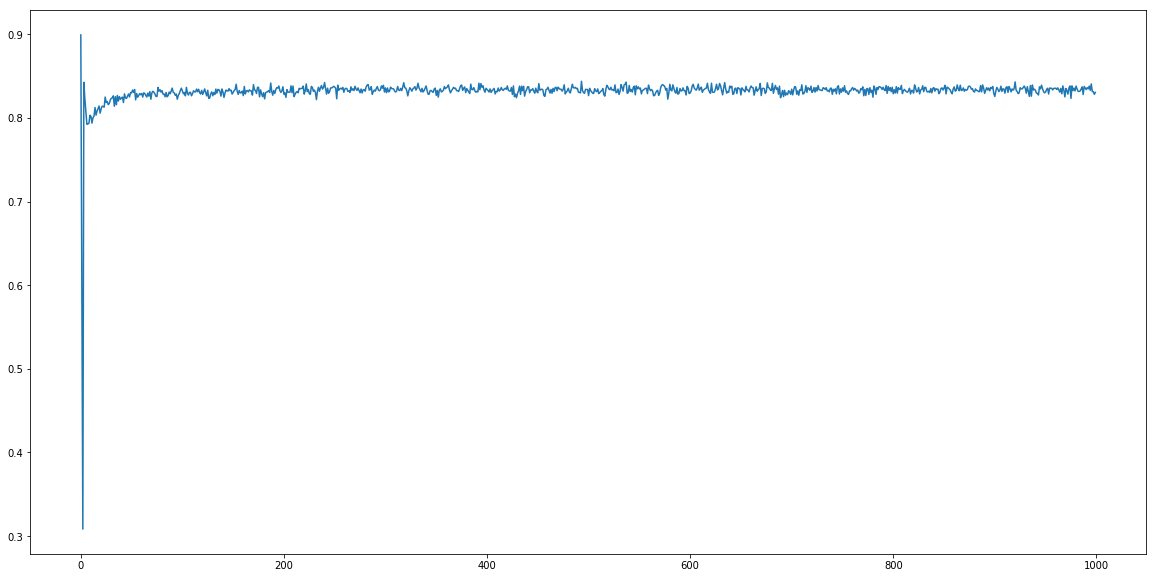

In [135]:
import numpy as np
import matplotlib.pyplot as plt
p_true = [0.9,0.6,0.3]
T = 1000
yasis = np.zeros(T)
for sim in range(10000):
    k = [0, 0, 0]
    p = [0, 0, 0]
    for el in [0.1]:
        x = []; y = []
        for t in range (T):
            if t<3:
                z = flip(p_true[t])
                k[t]=1; p[t]=z;
            else:
                choice = flip(el);
                if choice==1:
                    a = np.random.choice([0,1,2]);
                if choice ==0:
                    a = np.argmax(p);
                k[a] += k[a];
                z = flip(p_true[a]);
                p[a] = (z+(k[a]-1)*p[a])/k[a];
            x.append(t); y.append(z);
        yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

### el = 0.01

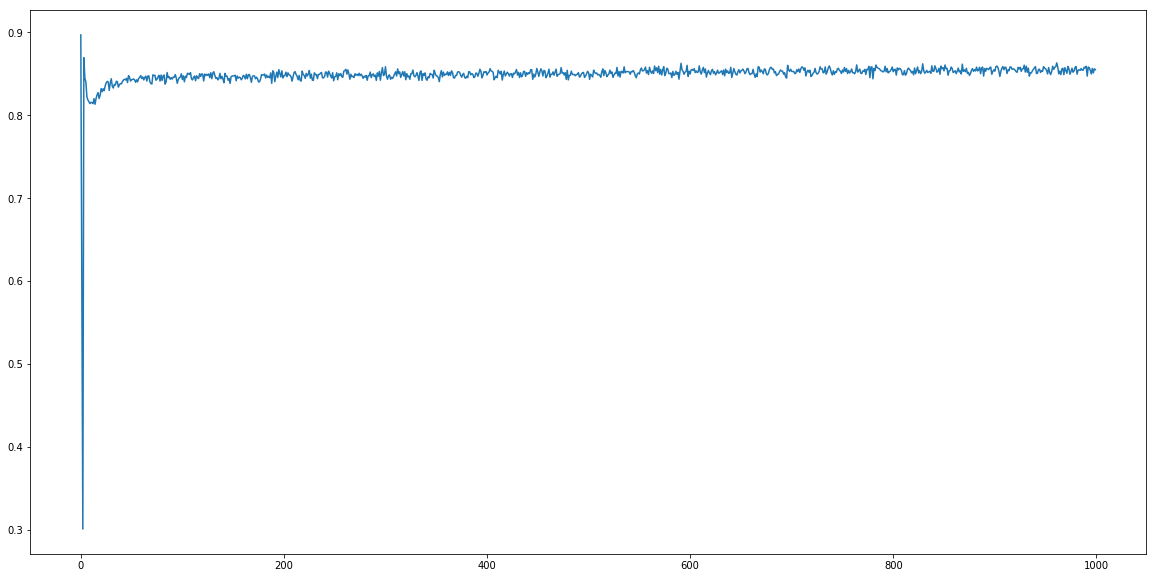

In [134]:
yasis = np.zeros(T)
for sim in range(10000):
    k = [0, 0, 0]
    p = [0, 0, 0]
    for el in [0.01]:
        x = []; y = []
        for t in range (T):
            if t<3:
                z = flip(p_true[t])
                k[t]=1; p[t]=z;
            else:
                choice = flip(el);
                if choice==1:
                    a = np.random.choice([0,1,2]);
                if choice ==0:
                    a = np.argmax(p);
                k[a] += k[a];
                z = flip(p_true[a]);
                p[a] = (z+(k[a]-1)*p[a])/k[a];
            x.append(t); y.append(z);
        yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

### UCB

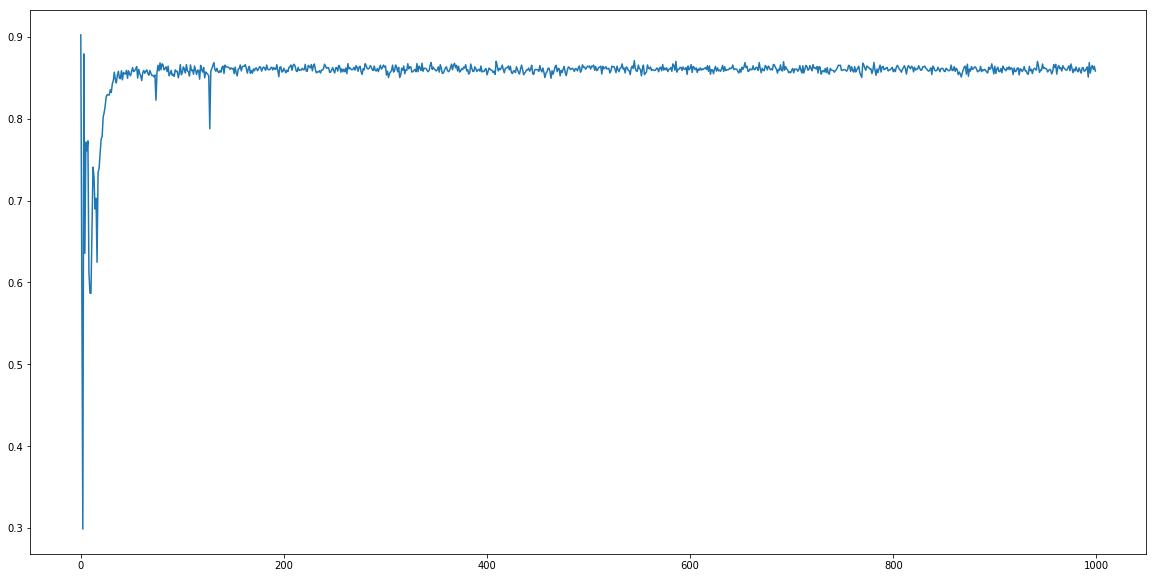

In [130]:
import numpy as np
from decimal import Decimal
p_true = [0.9,0.6,0.3]
T = 1000
yasis = np.zeros(T)
for sim in range(10000):
    k = [0, 0, 0]
    p = [0, 0, 0]
    p_u = [0, 0, 0]
    x = []; y = []
    for t in range (T):
        if t<3:
            z = flip(p_true[t])
            k[t]=1; p[t]=z;
        else:
            delta = 1./(1.+t*np.log(t)*np.log(t))
            for i in range(3):
                u = np.sqrt(-np.log(delta)/(2*k[i]))
                p_u[i] = p[i]+u
            a = np.argmax(p_u);
            k[a] += k[a];
            z = flip(p_true[a]);
            p[a] = (z+(k[a]-1)*p[a])/k[a];
        x.append(t); y.append(z)
    yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

### Discuss:

Converge rate: Greedy> epsilon greedy> UCB; Performance: Greedy< epsilon greedy< UCB

## Question 2

### Greedy

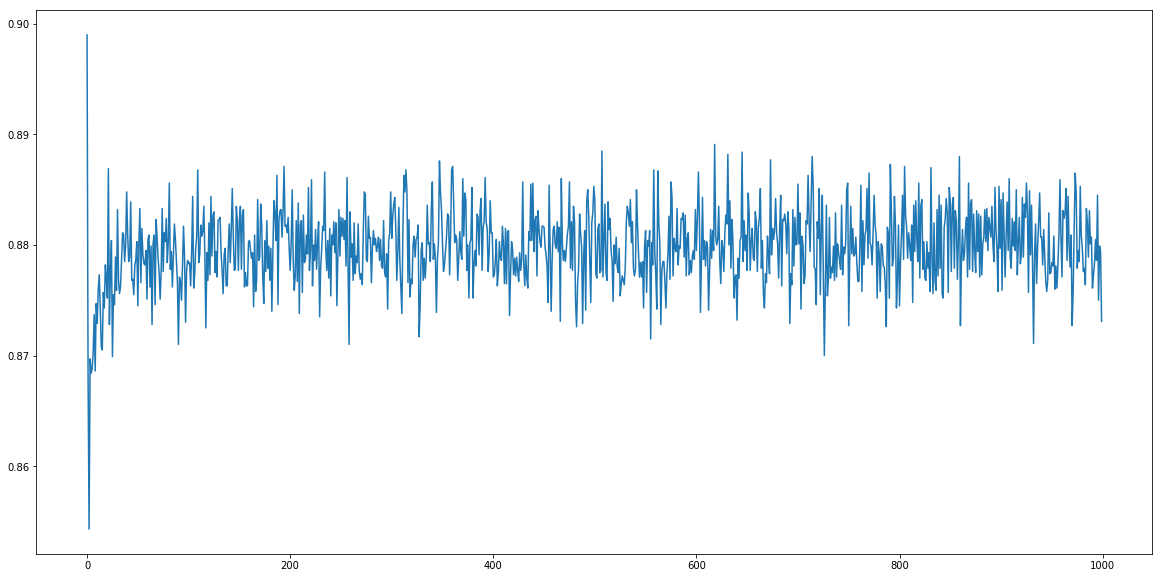

In [131]:
yasis = np.zeros(T)
for sim in range(10000):
    alpha = [1,1,1]; beta = [1,1,1]
    p = [0, 0, 0]
    x=[]; y=[];
    for t in range(T):
        for arm in range(3):
            p[arm] = alpha[arm]/(alpha[arm]+beta[arm])
        a = np.argmax(p)
        z = flip(p_true[a])
        alpha[a] += z; beta[a] += (1-z);
        x.append(t); y.append(z)
    yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

### epsilon-greedy

#### epsolon = 0.01

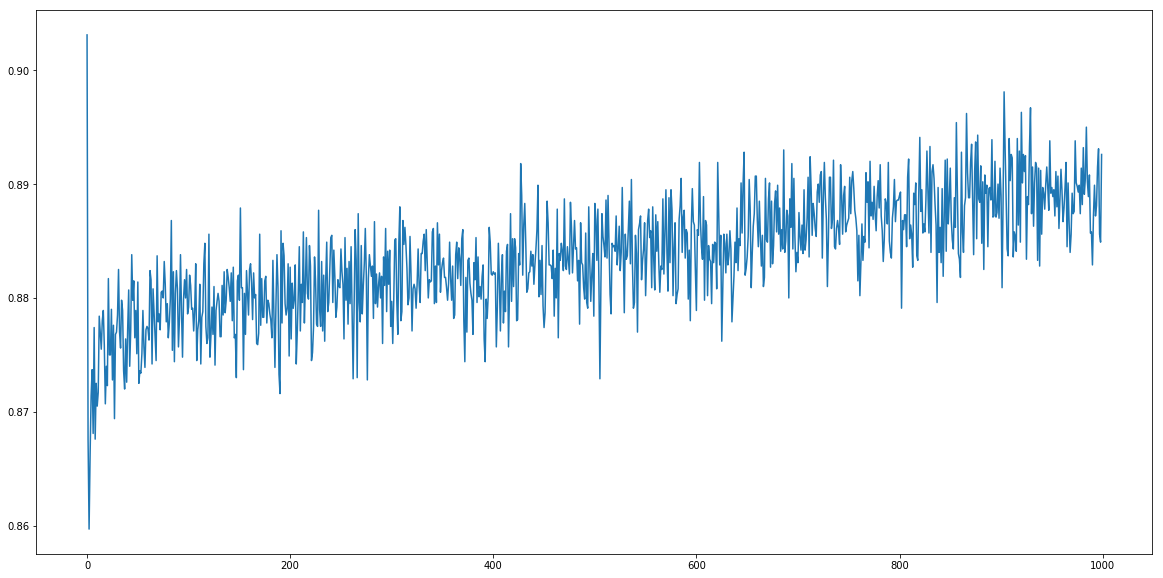

In [136]:
yasis = np.zeros(T)
for sim in range(10000):
    alpha = [1,1,1]; beta = [1,1,1]
    p = [0, 0, 0]
    x=[]; y=[];
    for t in range(T):
        for arm in range(3):
            p[arm] = alpha[arm]/(alpha[arm]+beta[arm])
        choice = flip(0.01);
        if choice==1:
            a = np.random.choice([0,1,2]);
        if choice ==0:
            a = np.argmax(p);
        z = flip(p_true[a])
        alpha[a] += z; beta[a] += (1-z);
        x.append(t); y.append(z)
    yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

#### epsolon = 0.1

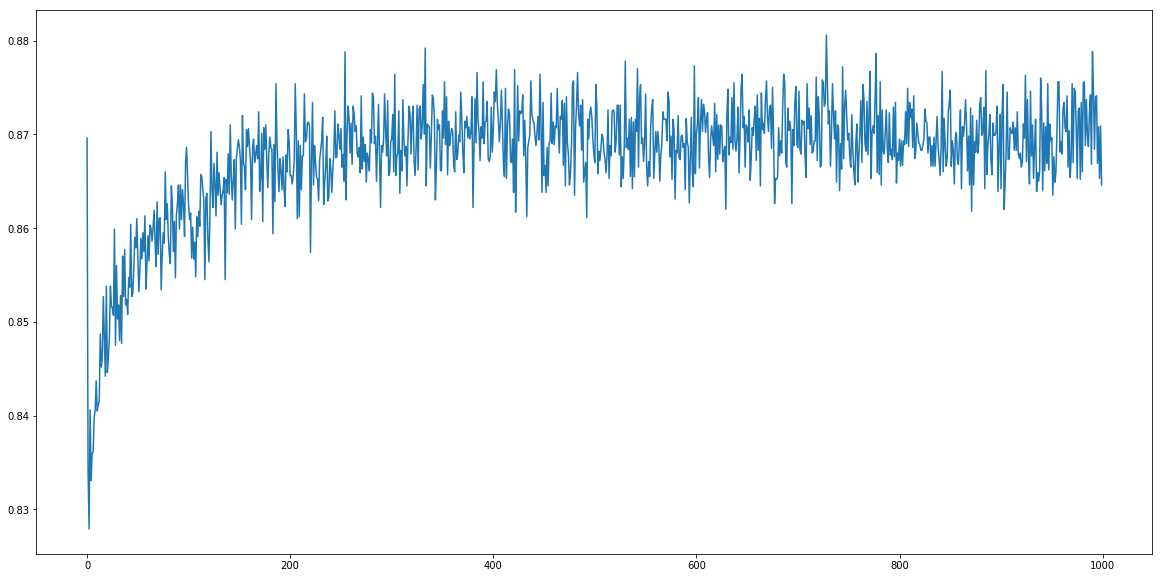

In [137]:
yasis = np.zeros(T)
for sim in range(10000):
    alpha = [1,1,1]; beta = [1,1,1]
    p = [0, 0, 0]
    x=[]; y=[];
    for t in range(T):
        for arm in range(3):
            p[arm] = alpha[arm]/(alpha[arm]+beta[arm])
        choice = flip(0.1);
        if choice==1:
            a = np.random.choice([0,1,2]);
        if choice ==0:
            a = np.argmax(p);
        z = flip(p_true[a])
        alpha[a] += z; beta[a] += (1-z);
        x.append(t); y.append(z)
    yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

### Thompson sampling

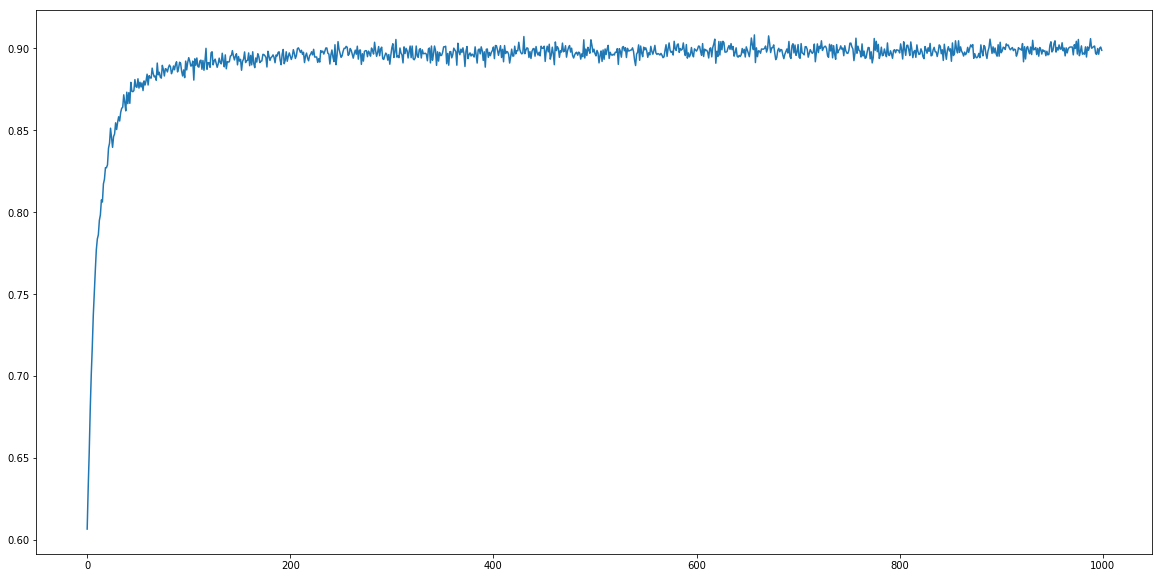

In [133]:
yasis = np.zeros(T)
for sim in range(10000):
    alpha = [1,1,1]; beta = [1,1,1]
    p = [0, 0, 0]
    x=[];y=[];
    for t in range(T):
        for arm in range(3):
            p[arm] = np.random.beta(alpha[arm], beta[arm])
        a = np.argmax(p)
        z = flip(p_true[a])
        alpha[a] += z; beta[a] += (1-z);
        x.append(t); y.append(z)
    yasis = yasis + np.array(y)
plt.figure(figsize=(20,10))
plt.plot(yasis/10000)

### Discuss

Converge rate and Variance: Greedy> epsilon greedy> Thompson sampling; Performance: Greedy< epsilon greedy< Thompson sampling

## Question 4

In [139]:
from scipy.optimize import linprog
c = [1., 1., 1., 1., 1/0.1]
A = [[0.9*0.7-1, 0.9*0.3, 0., 0., -1],
     [0.9*0.5, 0.9*0.5-1, 0, 0, -1], 
     [0., 0., 0.9*0.4-1, 0.9*0.6, -1],
     [0., 0., 0.9*0.8, 0.9*0.2-1, -1]]
b = [-12, -23, -27, -9]
res = linprog(c, A_ub=A, b_ub=b, options={"disp": True})
res

Optimization terminated successfully.
         Current function value: 206.657754  
         Iterations: 6


     fun: 206.6577540106952
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([4.33475936, 0.        , 0.        , 0.        ])
  status: 0
 success: True
       x: array([ 0.        ,  8.12834225, 13.23529412,  0.        , 18.52941176])